In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import constants
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

### 1\.

Give an estimate, with the related error, of the net magnetic moment of the sample. Remember that glycerin $(\text{C3H8O3})$ has a molar mass of $92.09382 \; g/mol$ and its density is $1.26 \; g/cm^3$.

In [2]:
h = [2.0, 0.2]
d = 0.8

vol1 = ((d / 2)**2) * constants.pi * h[0]
vol2 = (np.pi * h[1] / 2) * ((d / 2)**2 + ((h[1]**2) / 3))

total_volume = vol1 + vol2
approx_vol = vol1 = ((d / 2)**2) * constants.pi * (h[0] + h[1])

print(f"Total volume with spherical cap: {total_volume} cm^3")
print(f"Approximated volume (cylinder): {approx_vol} cm^3")

DeltaV = 0.159174

Total volume with spherical cap: 1.059763921810957 cm^3
Approximated volume (cylinder): 1.1058406140636075 cm^3


In [3]:
molar_mass = 92.09382
density = 1.26
spins_per_atom = 8

gyromag_ratio = 42.5756 * 10**6
mean_mu = gyromag_ratio * constants.hbar / 2

n_spins = spins_per_atom * density * total_volume * constants.N_A / molar_mass
error_n_spins = spins_per_atom * density * DeltaV * constants.N_A / molar_mass

print(f"Total number of spins: {n_spins} +/- {error_n_spins}")
print(f"Net magnetic moment: {mean_mu * n_spins} +/- {mean_mu * error_n_spins}")

Total number of spins: 6.9853806581064174e+22 +/- 1.0491874256045608e+22
Net magnetic moment: 0.0001568184004581859 +/- 2.3553747736454795e-05


### 2\.

Report the experimental parameters used in your experiment:
- measured Bfield, current flowing in the electromagnet
- drive generator and local oscillator generator frequencies ($\nu_{RF}$ and $\nu_{LO}$ respectively)
- the Larmor frequency of the precessing spins for the measured B.

Remember that for protons the gyromagnetic ratio is $\gamma_p = 42.5756 \;MHz/T$

In [4]:
measured_Bfield = 0.571
flowing_current = 8.89

rf_frequency = 24.33
lo_frequency = 24.3085

larmor_frequency = - measured_Bfield * gyromag_ratio

print(f"Larmor frequency of the precessing spins for the measured B: {larmor_frequency * 10**-6} MHz")

Larmor frequency of the precessing spins for the measured B: -24.310667599999995 MHz


### 3\.

Show in a plot the free induction decay signal recorded after a $\frac{\pi}{2}$-pulse, and report the $T^{⋆}_2$ obtained by the fit. Display in the same plot the fit curve. Make a plot of the residuals and briefly describe your error analysis

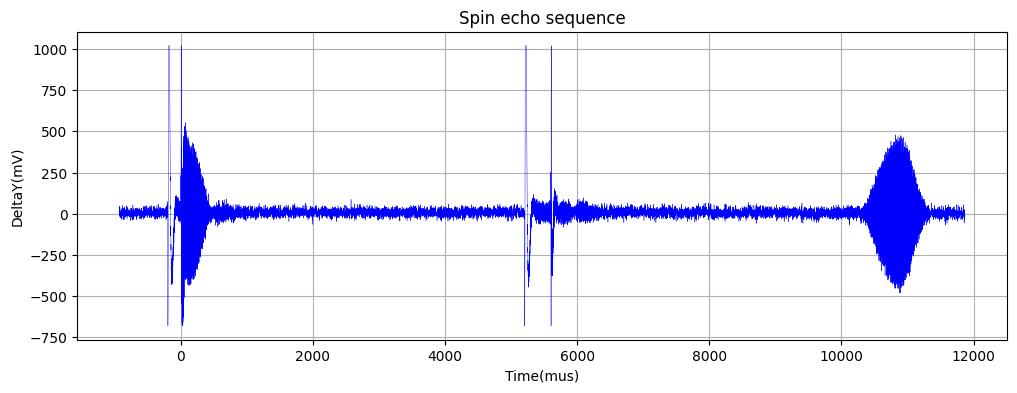

In [14]:
fid_signal = pd.read_csv("File1/File1_nozoom.csv", skiprows = lambda x: x % 50 != 0, engine="python")
fid_signal.iloc[:, 0] *= 10e5
fid_signal.iloc[:, 1] *= 10e2
fid_signal.columns = ["Time(mus)", "DeltaY(mV)"]

fig = plt.figure(figsize=(12, 4))

plt.plot(fid_signal.iloc[:, 0], fid_signal.iloc[:, 1], color = "blue", linewidth = 0.3)
plt.xlabel("Time(mus)")
plt.ylabel("DeltaY(mV)")
plt.title('Spin echo sequence')
plt.grid(True)

plt.show()

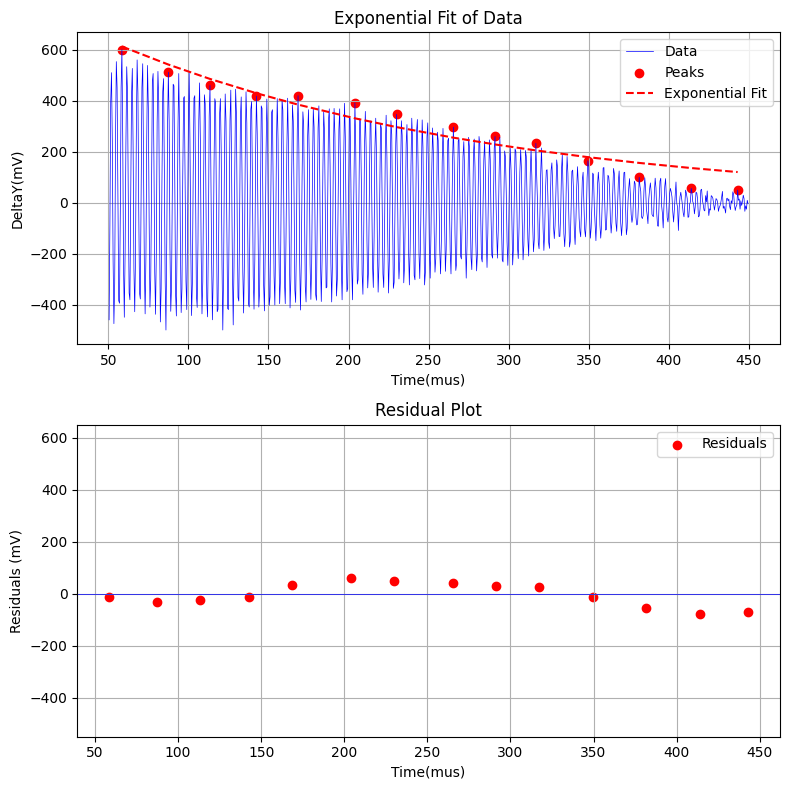

Amplitude: 784.2265417405067
T2*: 236.63993628743123 +/- 22.810894349385315


In [6]:
def exponential_func(x, a, tau):
    return a * np.exp(-x / tau)

fid_signal = pd.read_csv("File5/File5_fid.csv", skiprows= lambda x: x % 10 != 0, engine="python")
fid_signal.iloc[:, 0] *= 10e5
fid_signal.iloc[:, 1] *= 10e2
fid_signal.columns = ["Time(mus)", "DeltaY(mV)"]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
    
# Find peaks and perform exponential fit
peaks_ind, _ = find_peaks(fid_signal.iloc[:, 1], height=0, prominence=0.5, distance=50)
x_peaks = fid_signal.iloc[:, 0][peaks_ind]
peaks = fid_signal.iloc[:, 1][peaks_ind]
popt, pcov = curve_fit(exponential_func, x_peaks, peaks, p0=[600, 200])
std_dev_T2 = np.sqrt(pcov[1, 1])

# Plot the exponential fit on the first subplot
axes[0].plot(fid_signal.iloc[:, 0], fid_signal.iloc[:, 1], label='Data', color = "blue", linewidth = 0.5)
axes[0].scatter(x_peaks, peaks, label='Peaks', marker='o', color = "red")
axes[0].plot(x_peaks, exponential_func(x_peaks, *popt), label='Exponential Fit', color = "red", linestyle='--')
axes[0].set_xlabel("Time(mus)")
axes[0].set_ylabel("DeltaY(mV)")
axes[0].set_title('Exponential Fit of Data')
axes[0].legend()
axes[0].grid(True)

# Calculate the fitted values and residuals
fitted_values = exponential_func(x_peaks, *popt)
residuals = peaks - fitted_values

# Plot the residuals on the second subplot
axes[1].scatter(x_peaks, residuals, label='Residuals', marker='o', color = 'r')
axes[1].axhline(y=0, color='b', linestyle='-', linewidth=0.5)  # Add horizontal line at y=0 for reference
axes[1].set_xlabel(fid_signal.columns[0])
axes[1].set_ylabel('Residuals (mV)')
axes[1].set_ylim([-550, 650])
axes[1].set_title('Residual Plot')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Amplitude: {popt[0]}")
print(f"T2*: {popt[1]} +/- {std_dev_T2}")

File1:

Amplitude: 804.6550539160733
T2*: 250.01474176909838 +/- 18.33698516903408
Root Mean Square Error (RMSE): 48.26461750727921
Mean Absolute Error (MAE): 40.50849101702622


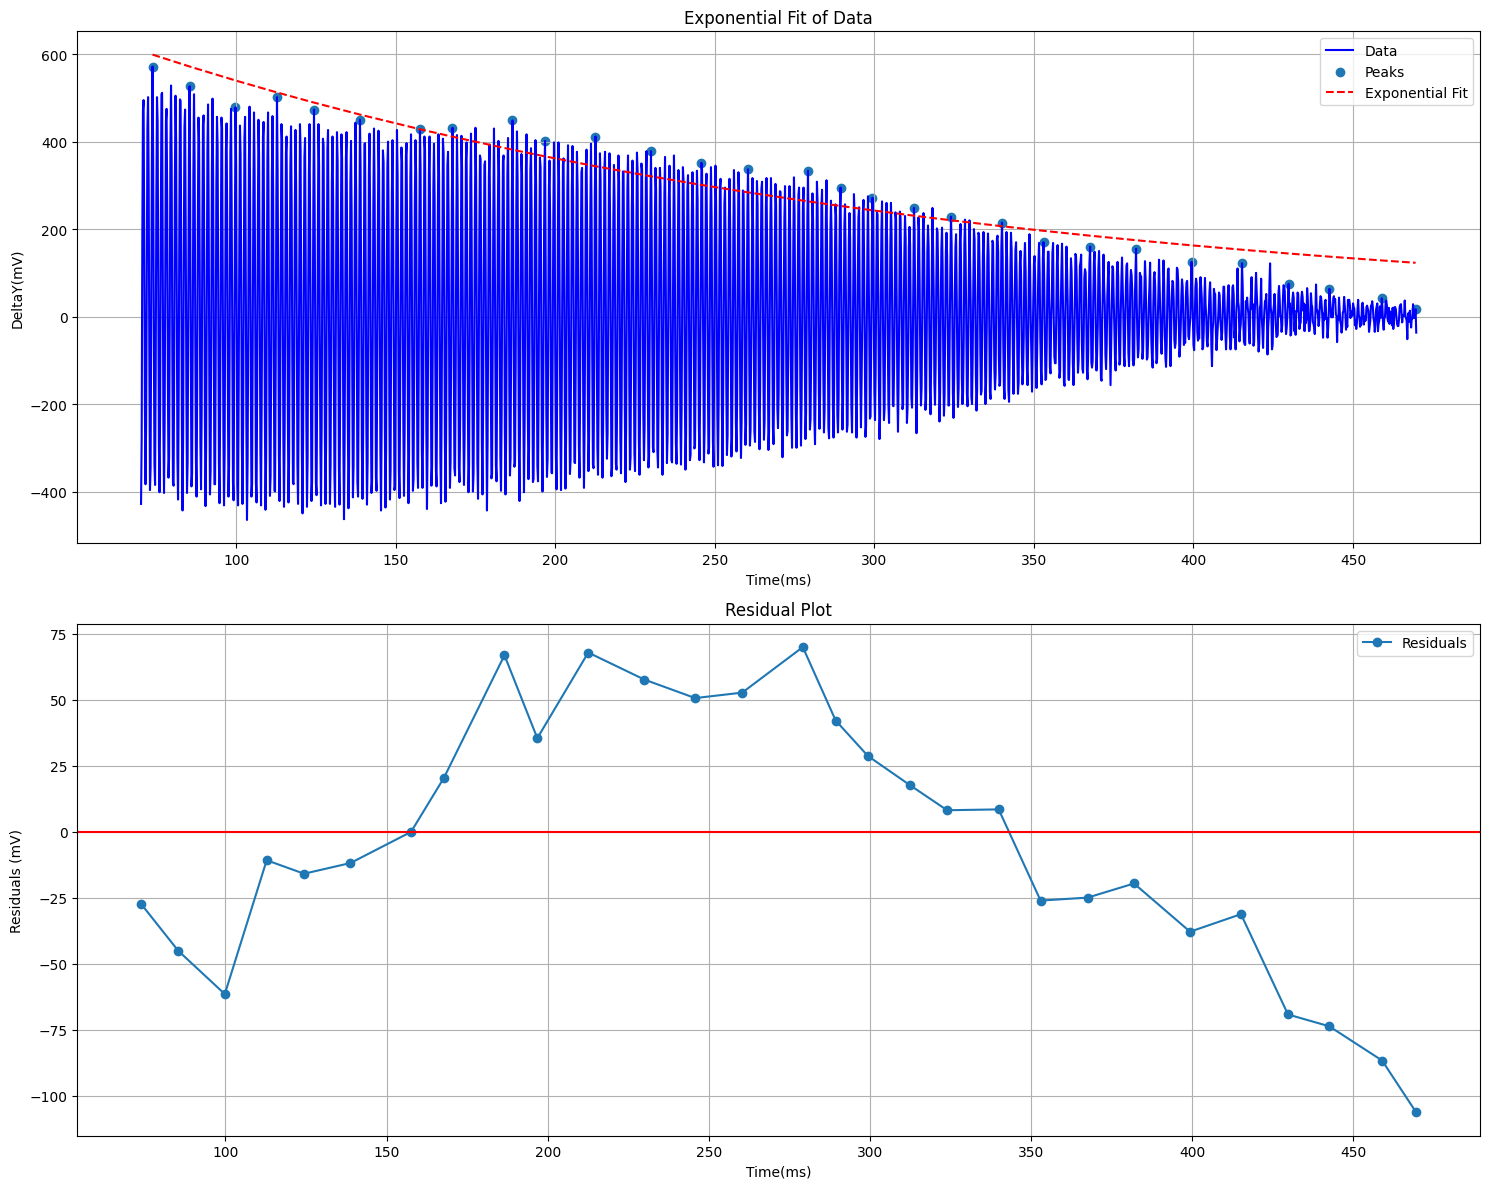

File2:

Amplitude: 884.5425188007545
T2*: 206.39846886458912 +/- 6.579731367174871
Root Mean Square Error (RMSE): 33.88363638346895
Mean Absolute Error (MAE): 28.966626718324324


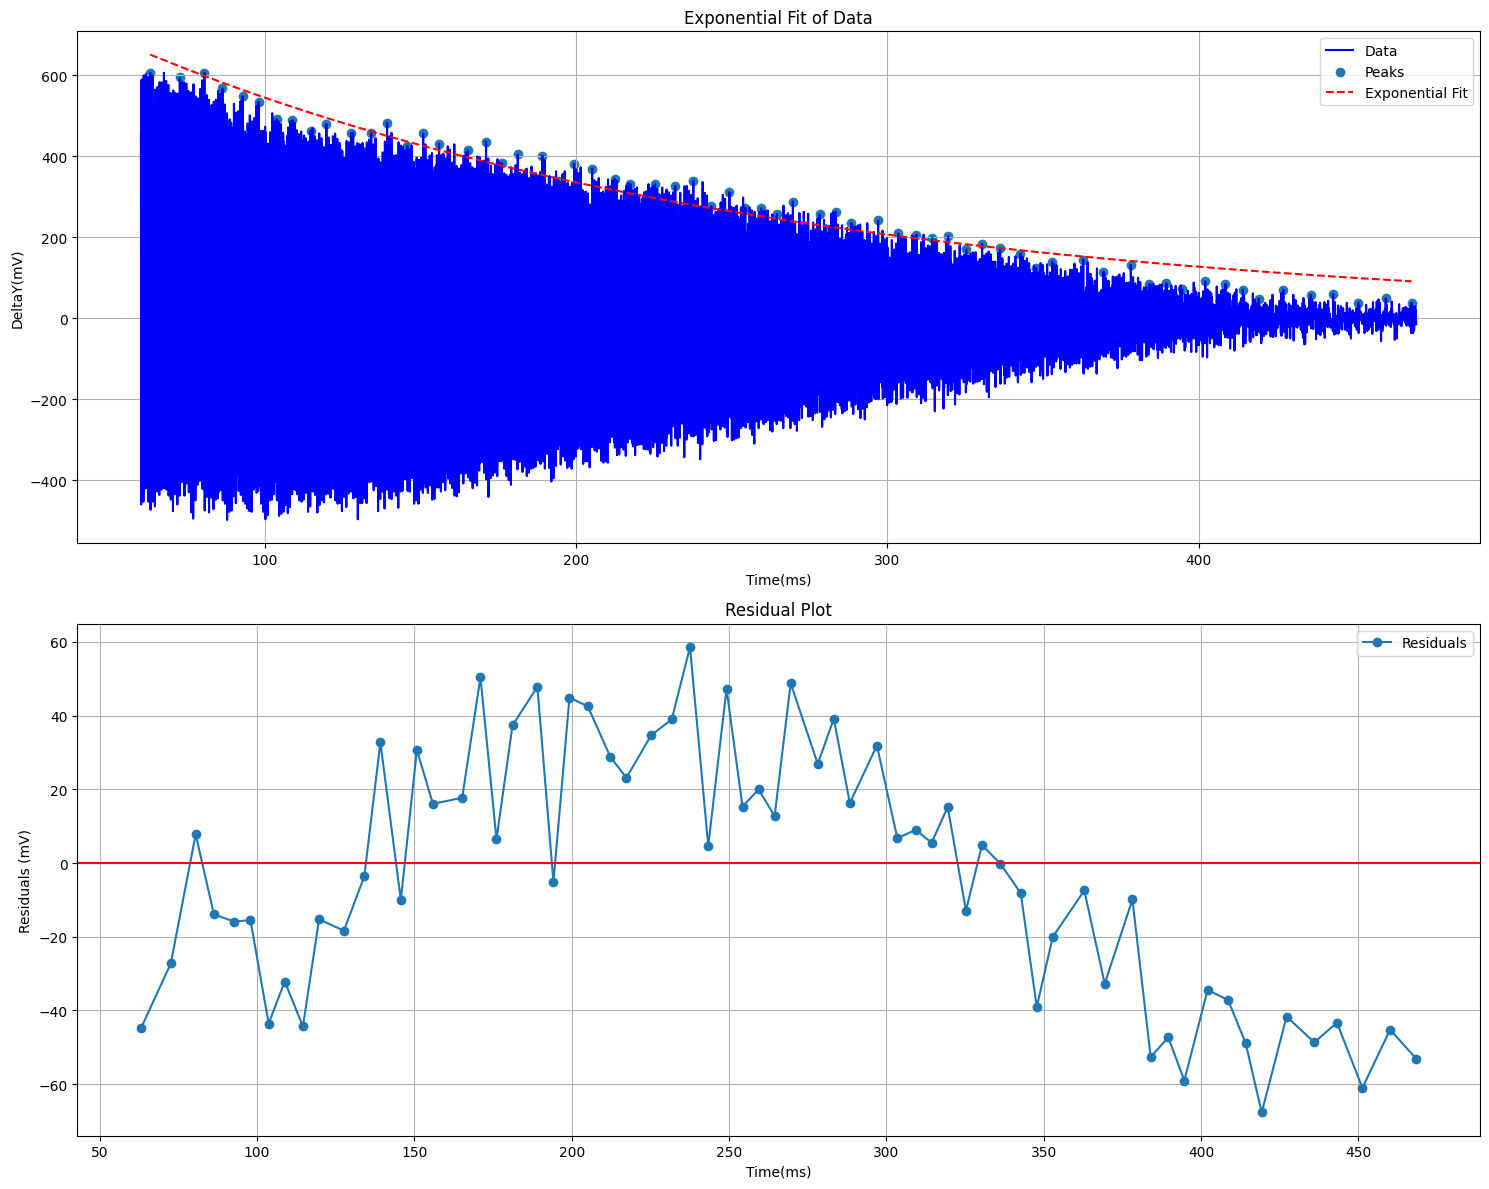

File3:

Amplitude: 778.0642652570394
T2*: 255.9646845113927 +/- 10.609143904085927
Root Mean Square Error (RMSE): 42.07933818223789
Mean Absolute Error (MAE): 35.25035009853726


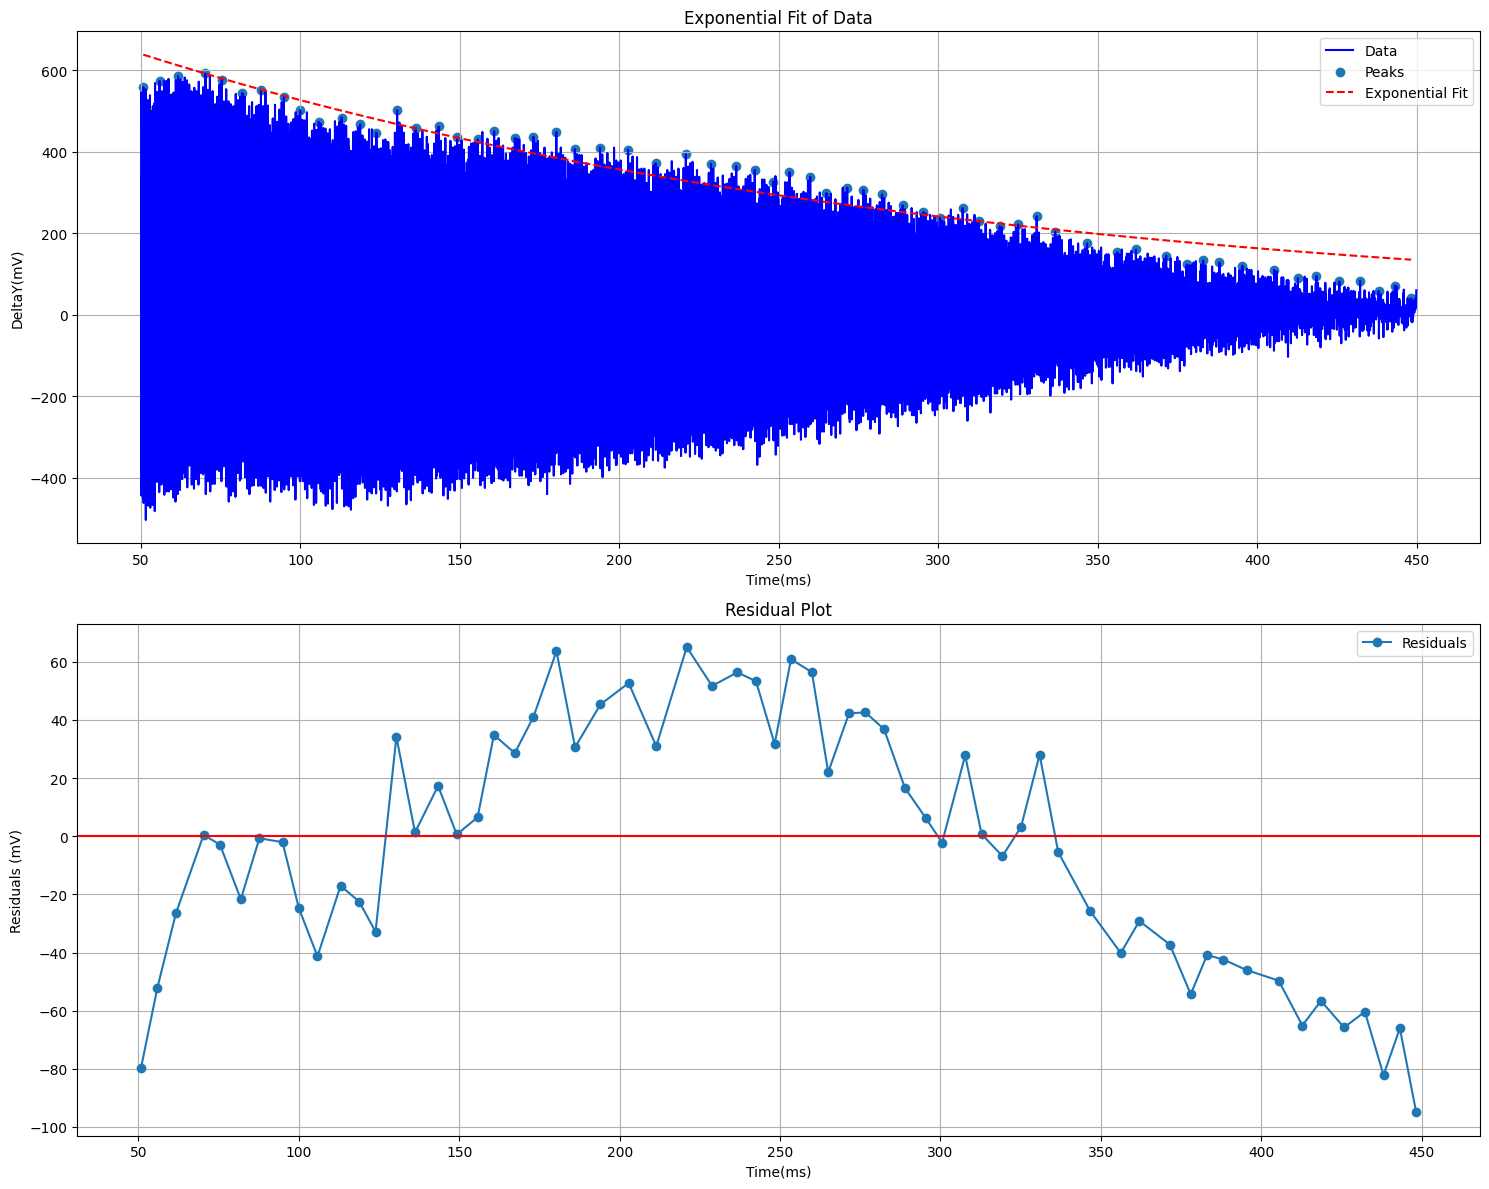

File4:

Amplitude: 897.3104727955781
T2*: 198.64449380956185 +/- 8.751647819398618
Root Mean Square Error (RMSE): 36.558474522024625
Mean Absolute Error (MAE): 29.729921715541803


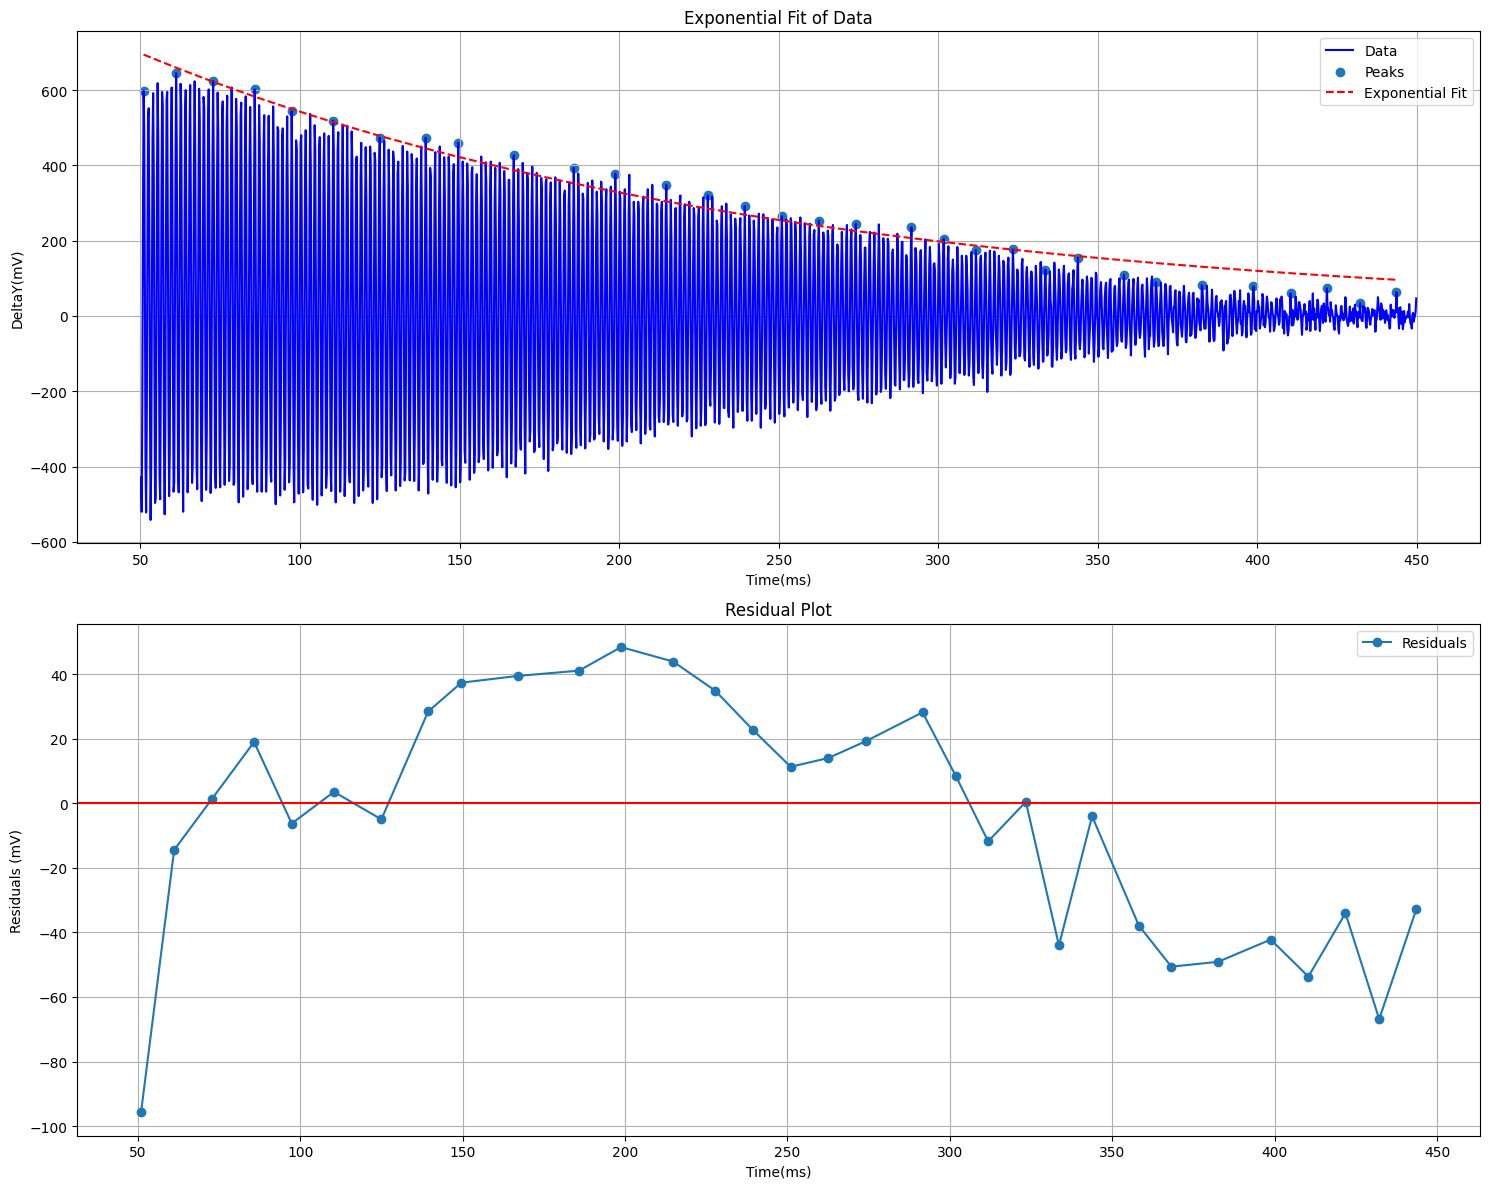

File5:

Amplitude: 784.2265417405067
T2*: 236.63993628743123 +/- 22.810894349385315
Root Mean Square Error (RMSE): 44.24491752528108
Mean Absolute Error (MAE): 39.003311002742116


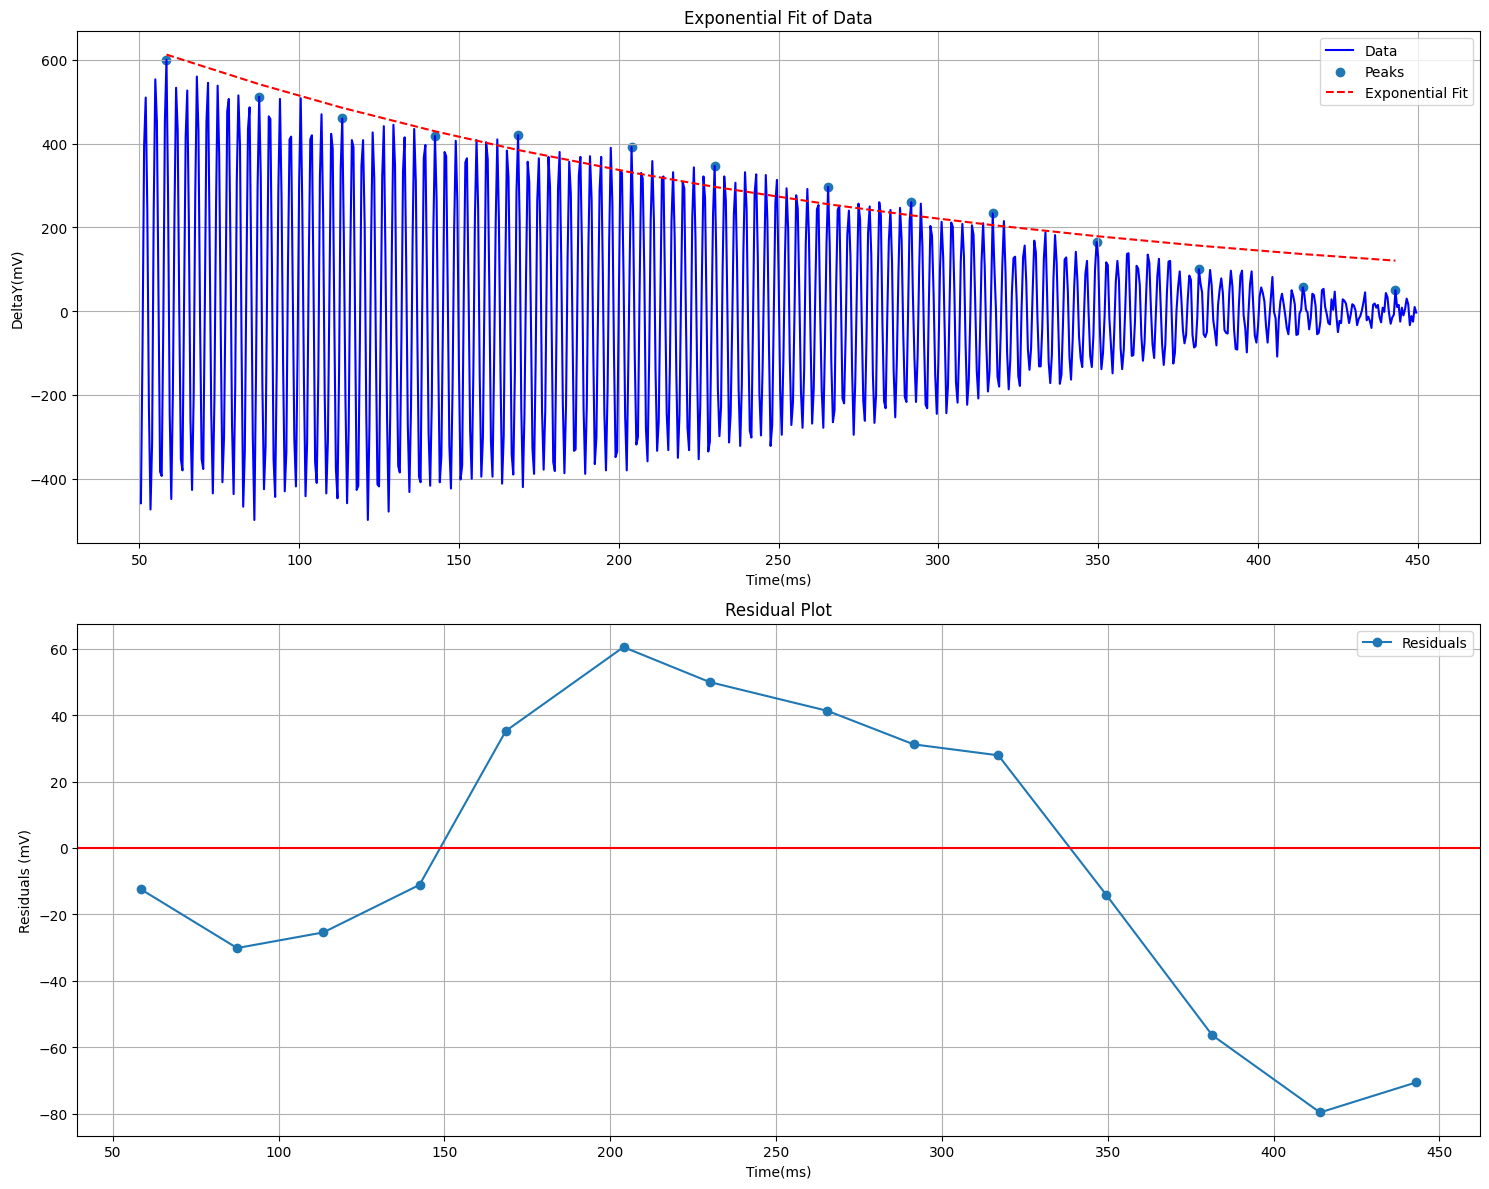

File6:

Amplitude: 899.977805446471
T2*: 194.99132302692826 +/- 14.238917220773377
Root Mean Square Error (RMSE): 21.490801597737253
Mean Absolute Error (MAE): 18.62220774978098


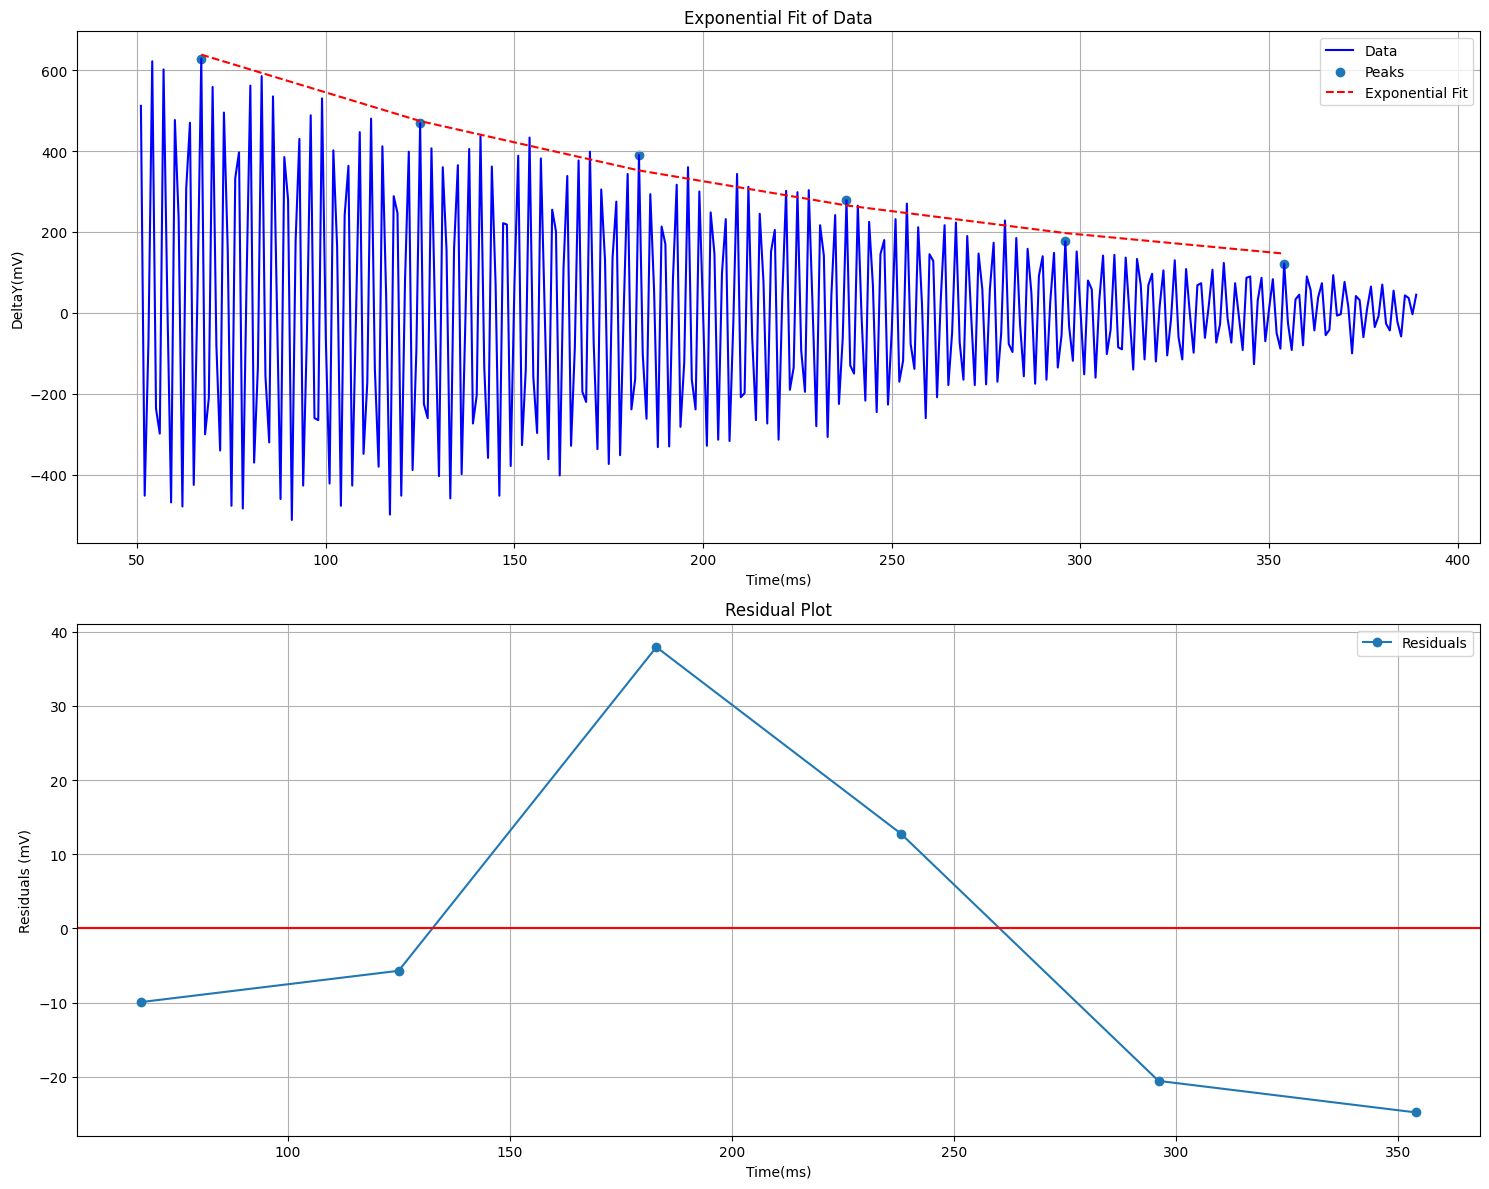

File7:

Amplitude: 764.0330437871586
T2*: 261.96398081385826 +/- 8.983789392271502
Root Mean Square Error (RMSE): 46.24588263442979
Mean Absolute Error (MAE): 39.768285940430296


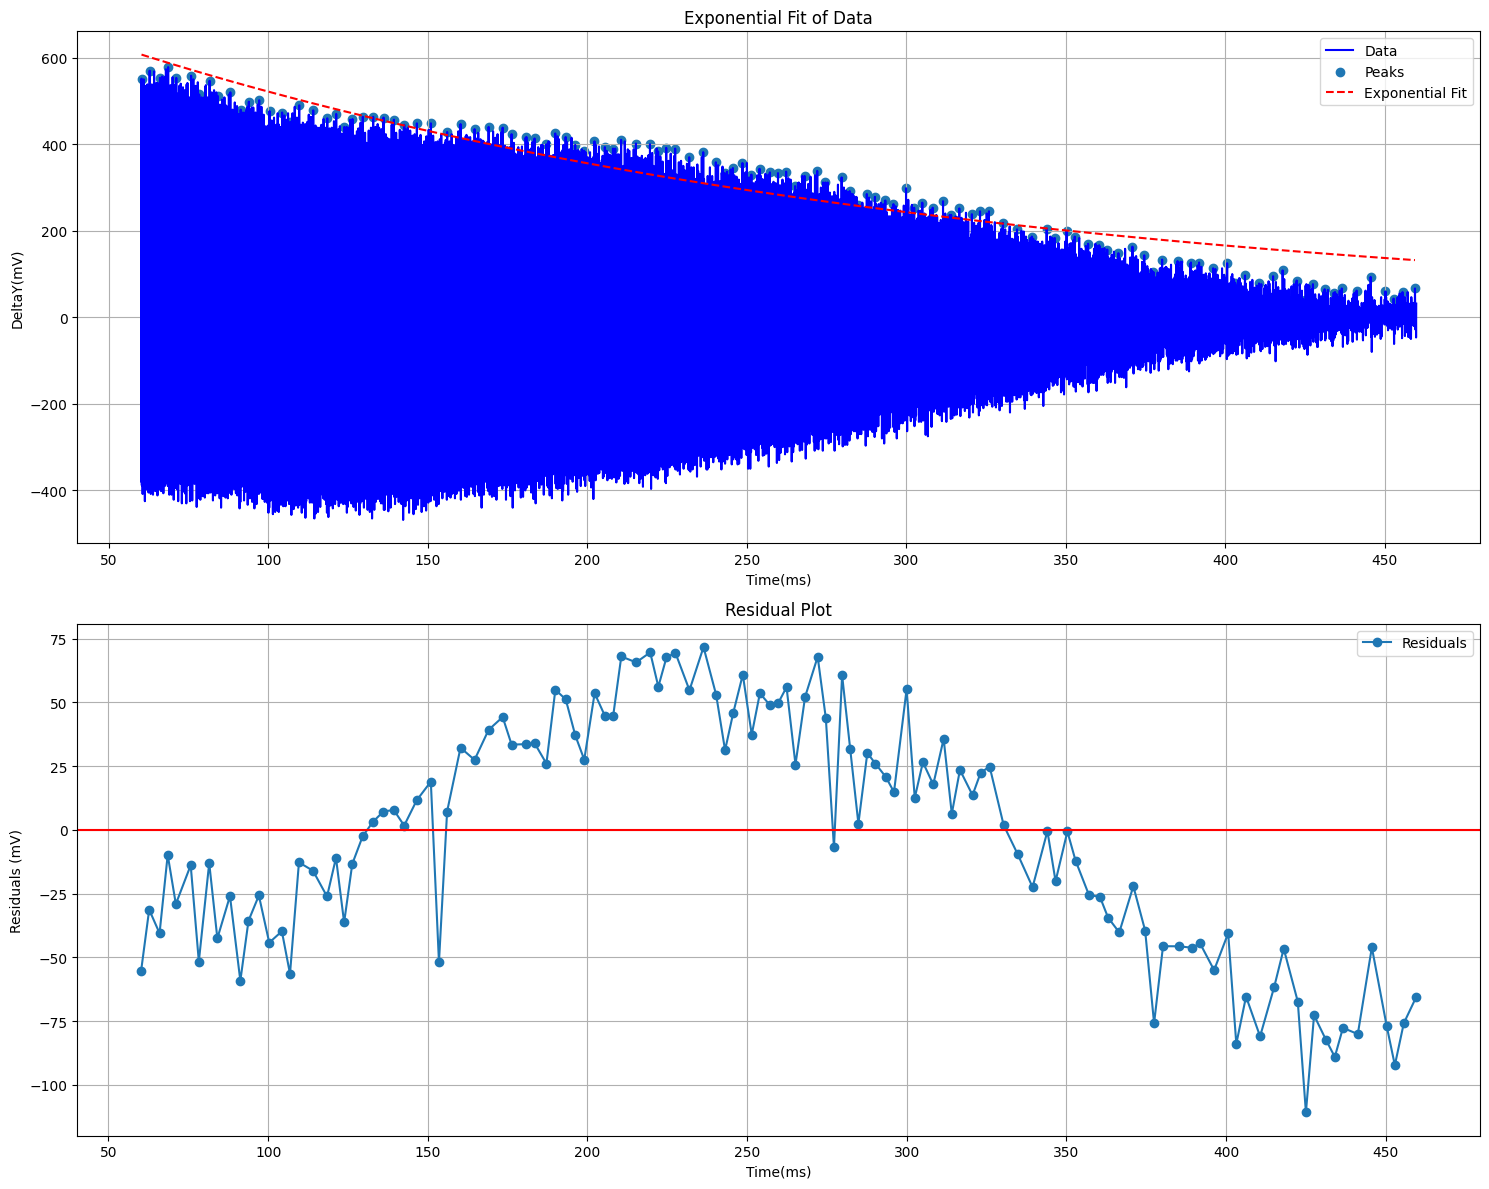

File8:

Amplitude: 786.6846498867372
T2*: 243.48426308524958 +/- 21.9687214934153
Root Mean Square Error (RMSE): 44.350479354065385
Mean Absolute Error (MAE): 38.568399488445834


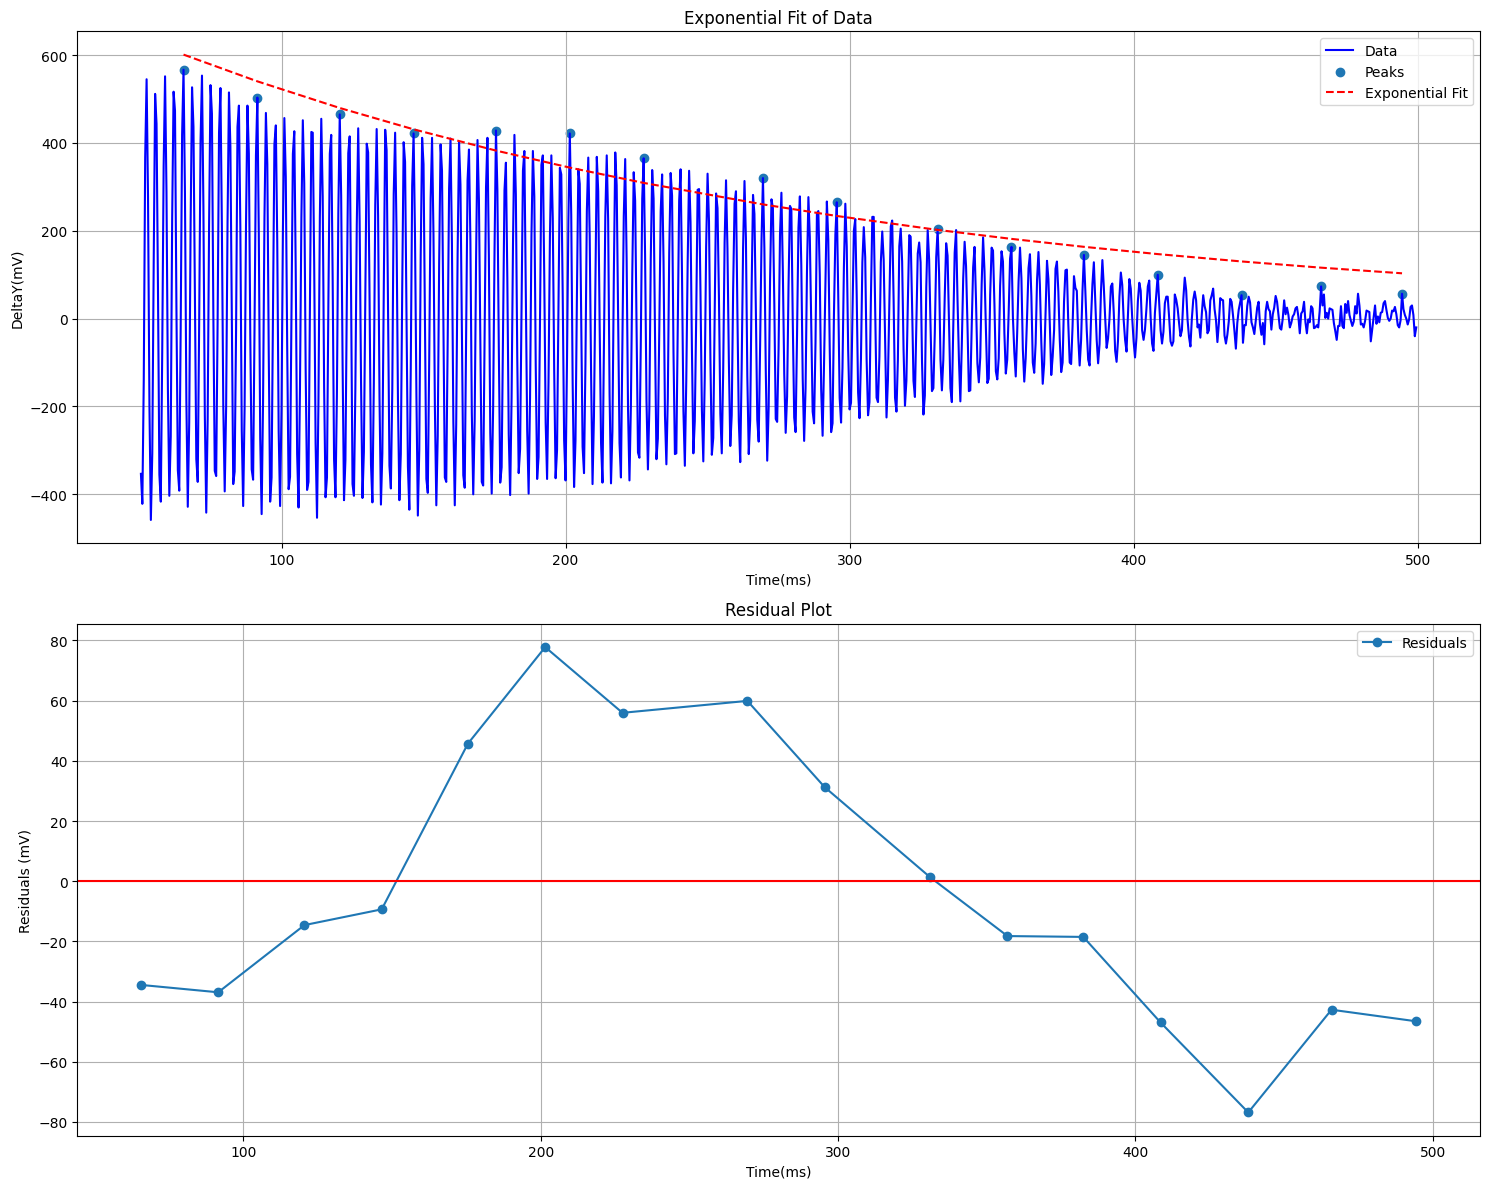

File9:

Amplitude: 722.7380956679352
T2*: 271.1466927182211 +/- 31.37587622204741
Root Mean Square Error (RMSE): 47.29792025764076
Mean Absolute Error (MAE): 40.88347318332529


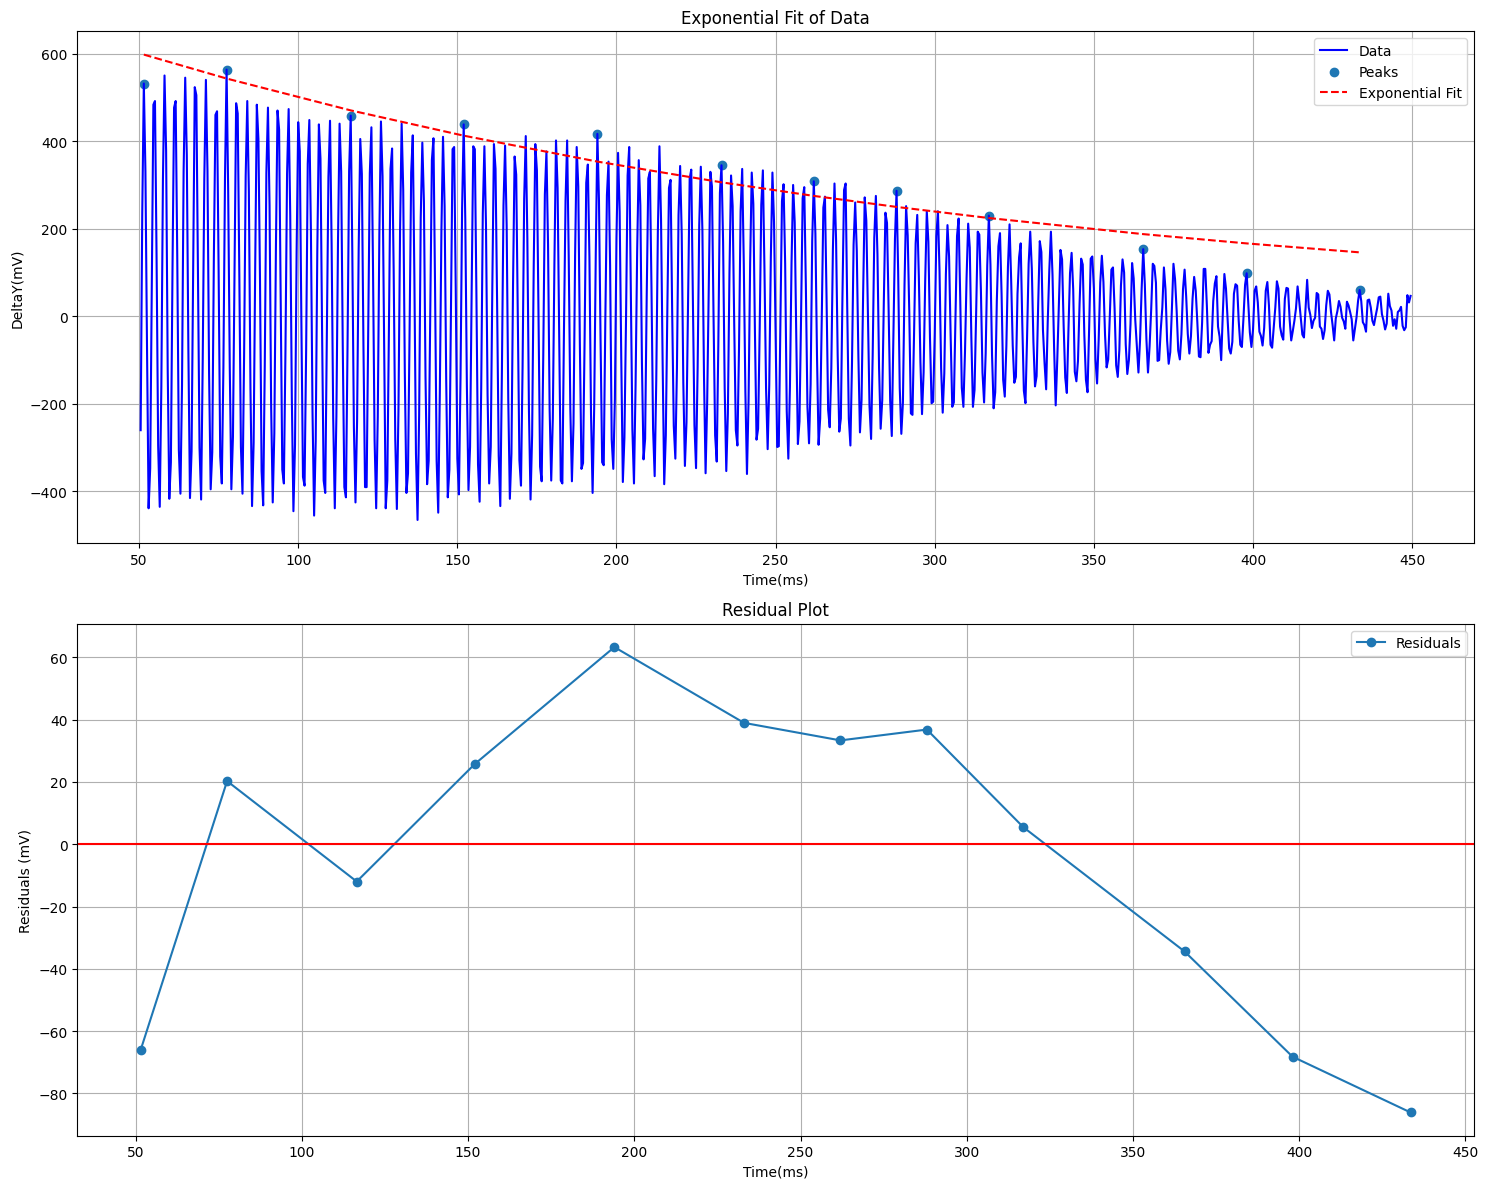

File10:

Amplitude: 749.4043624648849
T2*: 260.301739329736 +/- 25.729619312304795
Root Mean Square Error (RMSE): 41.68299231642467
Mean Absolute Error (MAE): 36.29838344326869


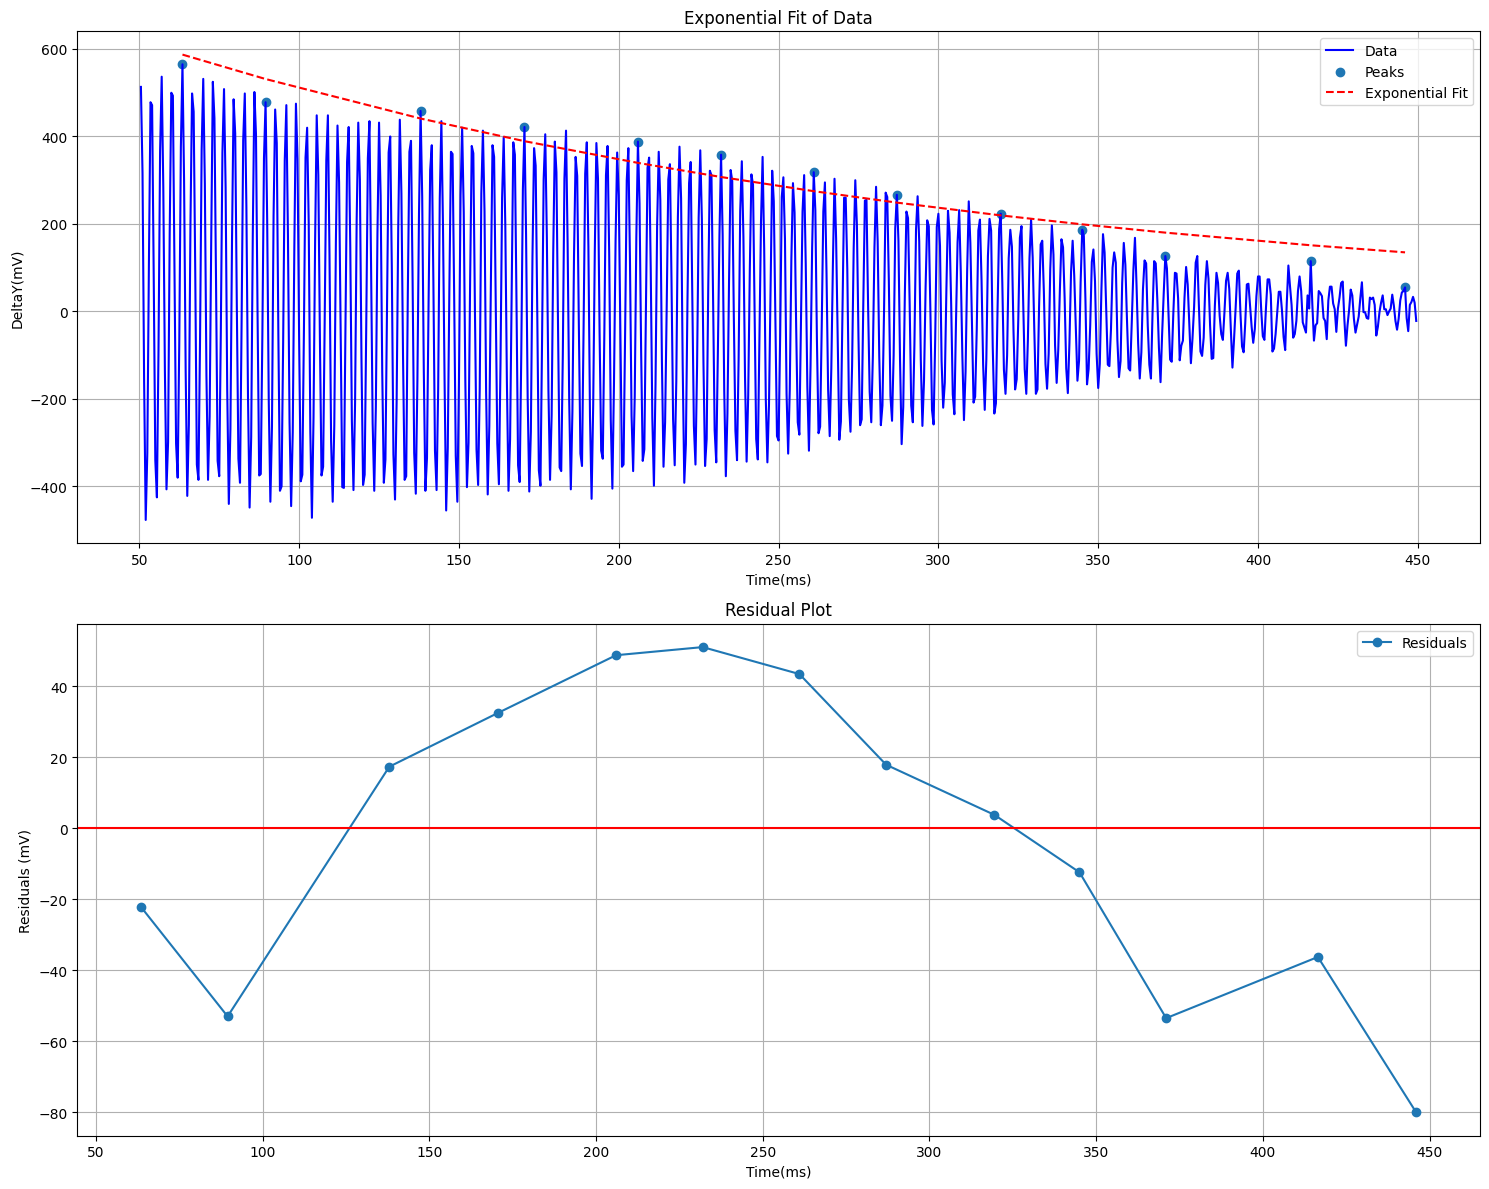

File11:

Amplitude: 650.9908479474111
T2*: 381.1005652103876 +/- 72.18585743774378
Root Mean Square Error (RMSE): 24.184864448197445
Mean Absolute Error (MAE): 20.2398469801837


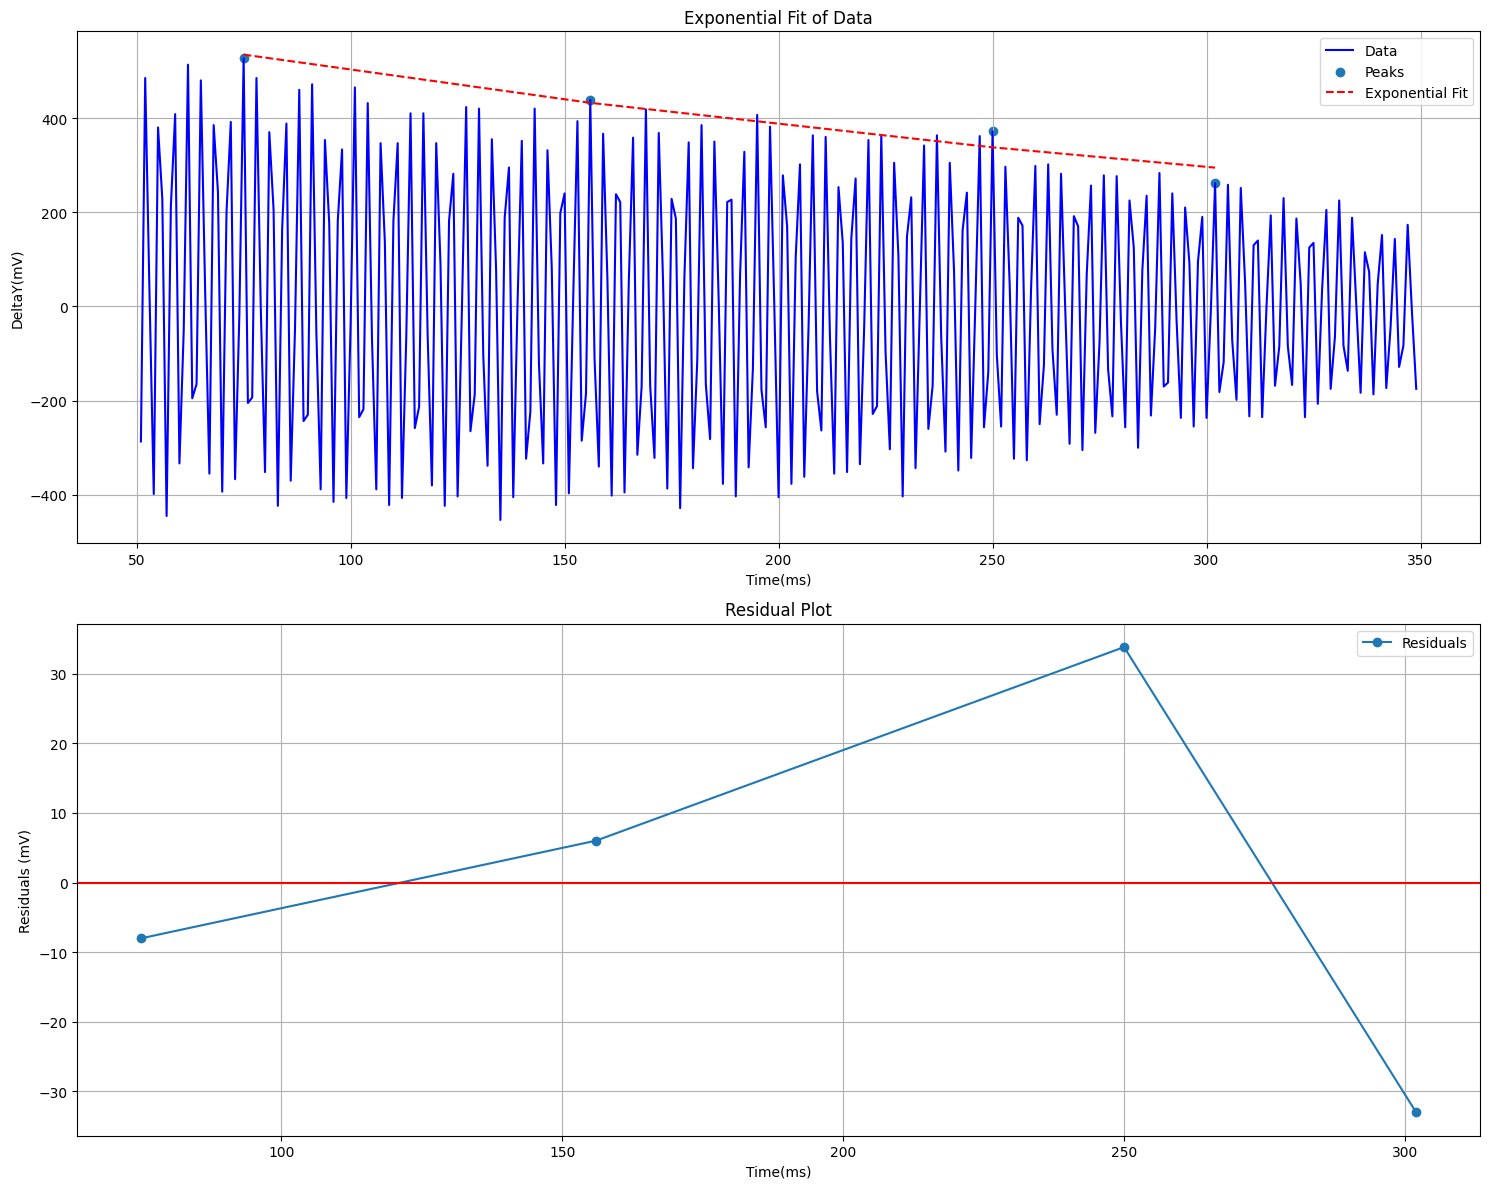

File12:

Amplitude: 814.0887982292513
T2*: 229.34122391402687 +/- 12.458092175317804
Root Mean Square Error (RMSE): 43.03603488362785
Mean Absolute Error (MAE): 36.43107349875934


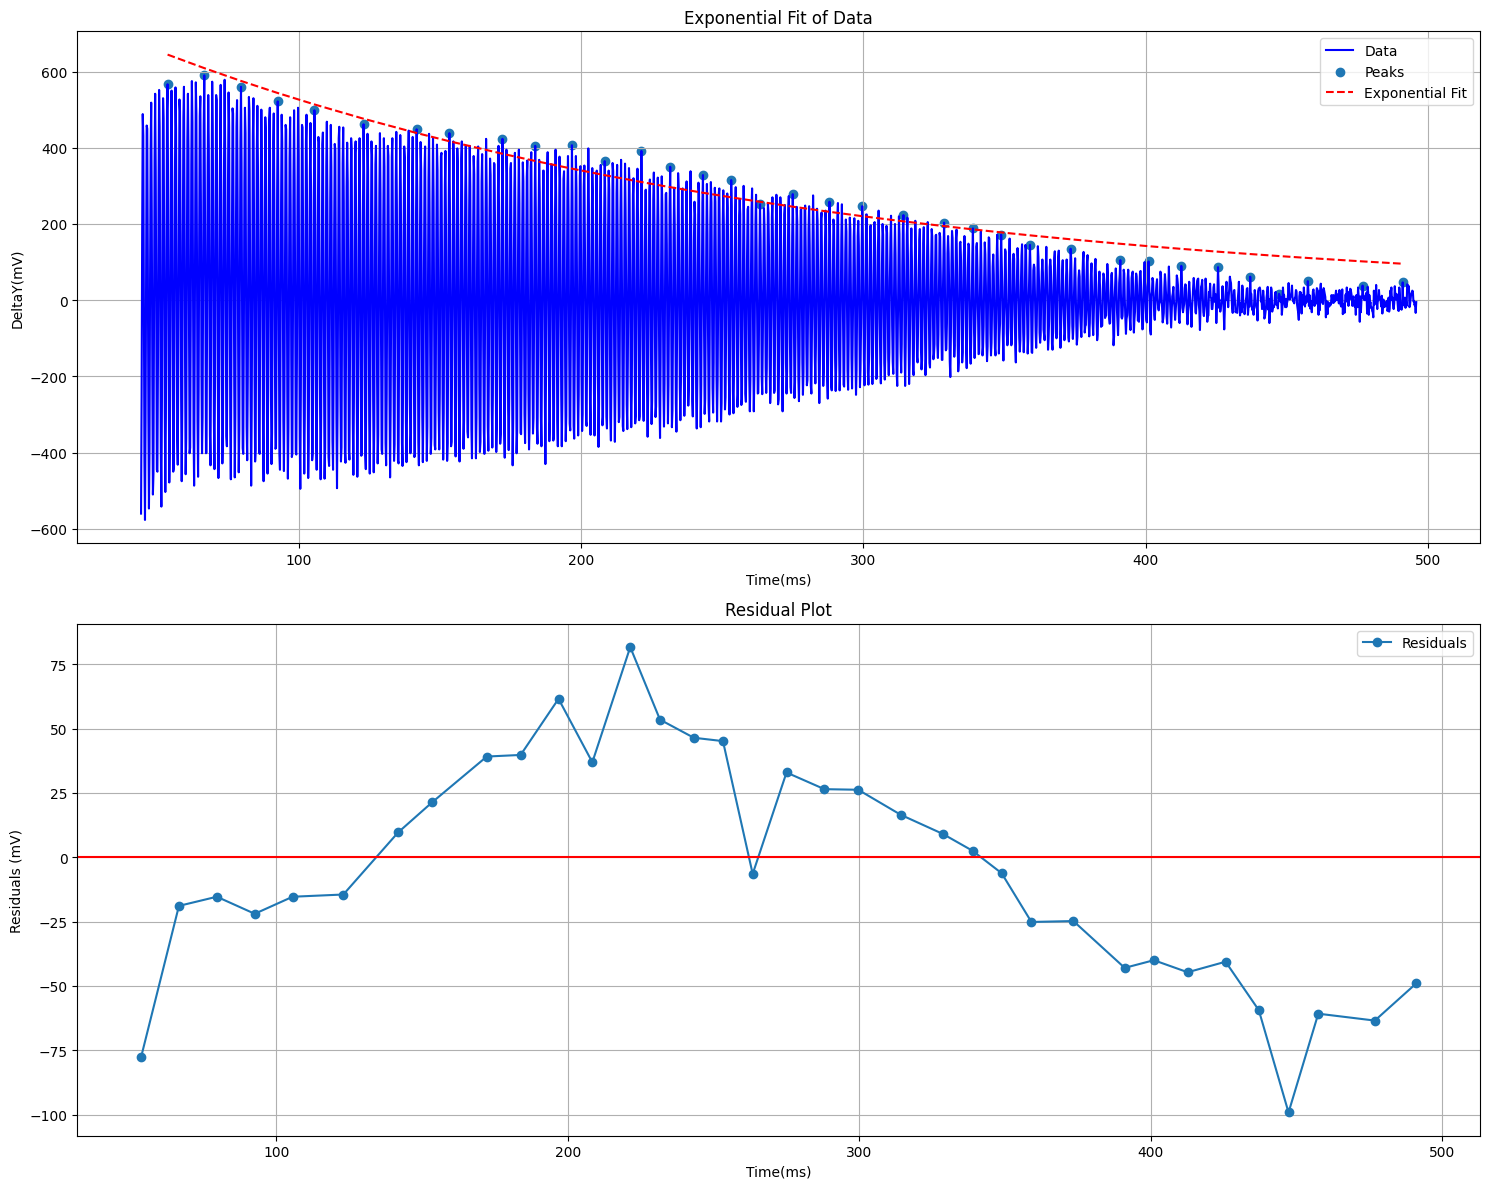

File13:

Amplitude: 683.1739861337846
T2*: 253.24153481966482 +/- 66.60390825251449
Root Mean Square Error (RMSE): 45.095209847194035
Mean Absolute Error (MAE): 41.8515315113127


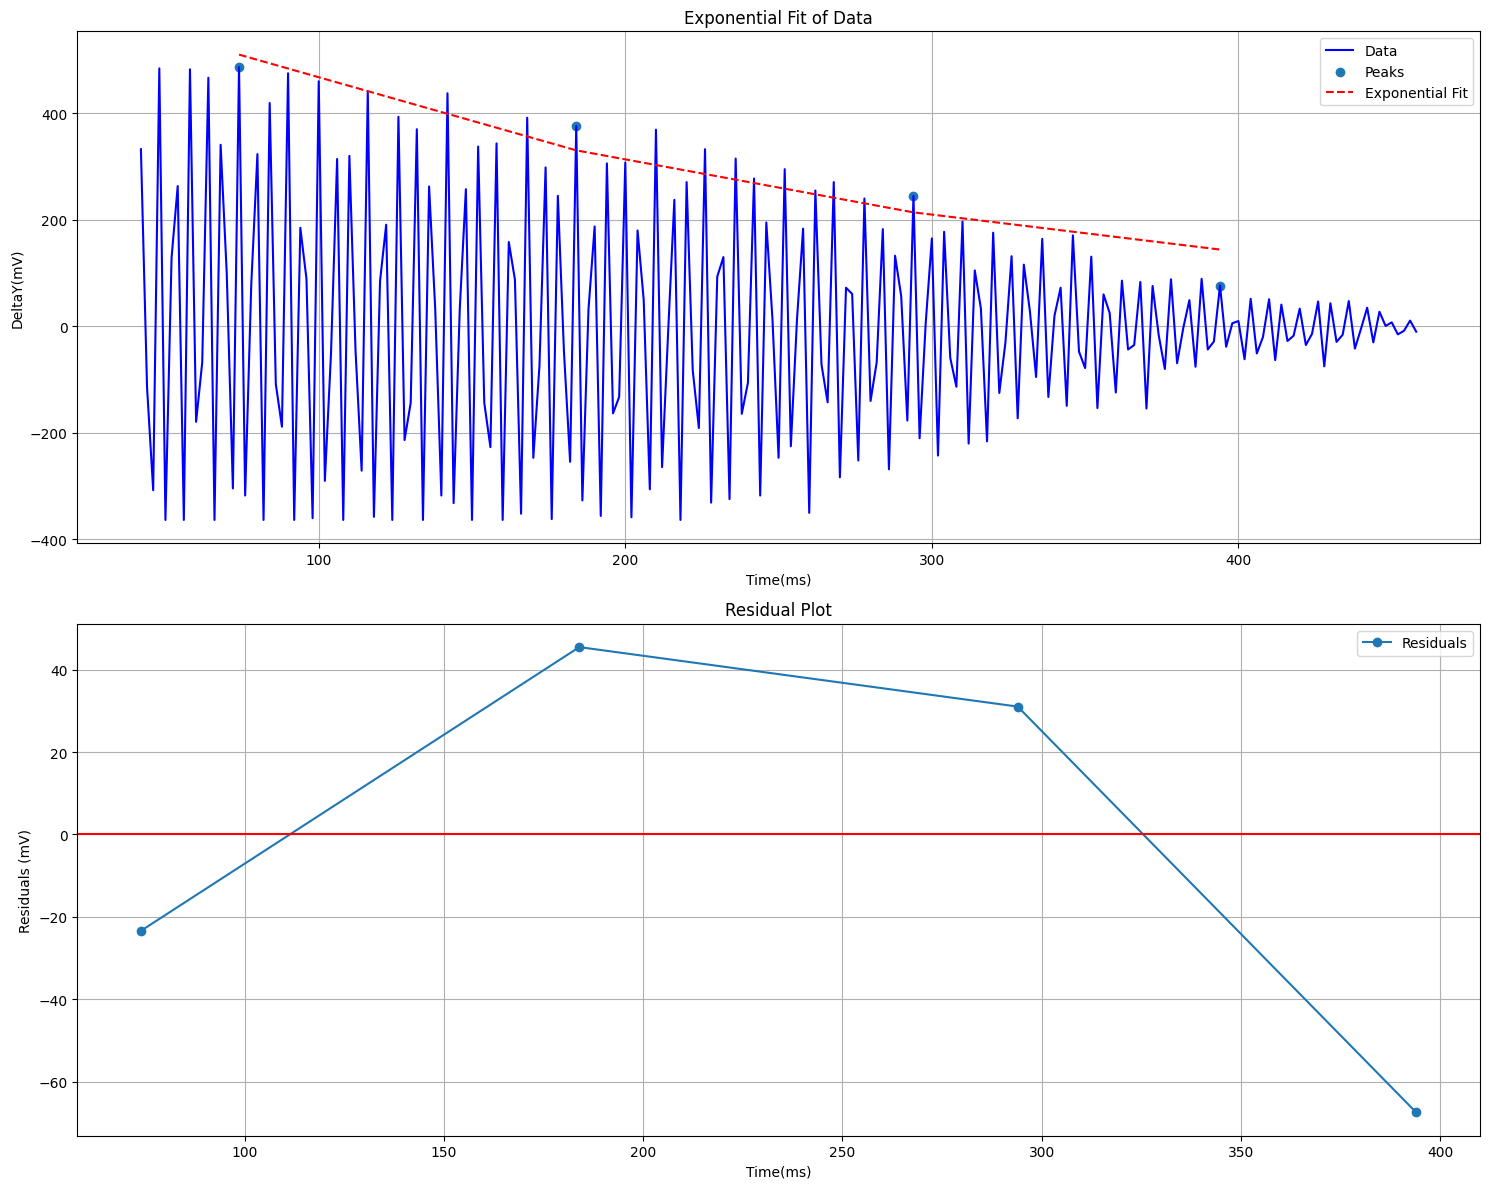

249.4795113969343
59.173971837980496


In [7]:
# Define the function for exponential fit
def exponential_func(x, a, tau):
    return a * np.exp(-x / tau)
  
T2_values = []
std_values = []

# Iterate over the files
for i in range(1, 14):
    # Read the CSV file
    filename = f"File{i}/File{i}_fid.csv"
    fid_signal = pd.read_csv(filename, skiprows = lambda x: x % 10 != 0, engine="python")
    
    # Scale the values in the DataFrame
    fid_signal.iloc[:, 0] *= 10e5
    fid_signal.iloc[:, 1] *= 10e2
        
    # Rename the columns for clarity
    fid_signal.columns = ["Time(ms)", "DeltaY(mV)"]
    
    # Create a new figure with two subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
    
    # Find peaks and perform exponential fit
    peaks_ind, _ = find_peaks(fid_signal.iloc[:, 1], height=0, prominence=0.5, distance=50)
    x_peaks = fid_signal.iloc[:, 0][peaks_ind]
    peaks = fid_signal.iloc[:, 1][peaks_ind]
    popt, pcov = curve_fit(exponential_func, x_peaks, peaks, p0=[600, 200])
    std_dev_T2 = np.sqrt(pcov[1, 1])
    std_values.append(std_dev_T2)
    
    # Plot the exponential fit on the first subplot
    axes[0].plot(fid_signal.iloc[:, 0], fid_signal.iloc[:, 1], label='Data', color = "blue")
    axes[0].scatter(x_peaks, peaks, label='Peaks', marker='o')
    axes[0].plot(x_peaks, exponential_func(x_peaks, *popt), label='Exponential Fit', color = "red", linestyle='--')
    axes[0].set_xlabel("Time(ms)")
    axes[0].set_ylabel("DeltaY(mV)")
    axes[0].set_title('Exponential Fit of Data')
    axes[0].legend()
    axes[0].grid(True)
    
    # Calculate the fitted values and residuals
    fitted_values = exponential_func(x_peaks, *popt)
    residuals = peaks - fitted_values
    
    # Plot the residuals on the second subplot
    axes[1].plot(x_peaks, residuals, label='Residuals', marker='o')
    axes[1].axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0 for reference
    axes[1].set_xlabel(fid_signal.columns[0])
    axes[1].set_ylabel('Residuals (mV)')
    axes[1].set_title('Residual Plot')
    axes[1].legend()
    axes[1].grid(True)
    
    # Calculate Root Mean Square Error (RMSE) and Mean Absolute Error (MAE)
    rmse = np.sqrt(np.mean(residuals**2))
    mae = np.mean(np.abs(residuals))
    
    T2_values.append([popt[1], std_dev_T2])
    
    # Print file
    print(f"File{i}:\n")
    # Print popt
    print(f"Amplitude: {popt[0]}")
    print(f"T2*: {popt[1]} +/- {std_dev_T2}")

    print("Root Mean Square Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    
    # Show the figure for the current cycle
    plt.tight_layout()
    plt.show()
    
print(np.mean([T2_values[i][0] for i in range(0, len(T2_values))]))
std_values = std_values[:10]
print(np.sqrt(np.sum(np.square(np.array(std_values)))))

### 4\.

Explain the pulses sequence used to measure the spin-spin relaxation time T2. What is the effect of the second pulse on each precessing spin and in turn on the magnetization vector?
A pictorial representation can be also used here.

### 5\.

Report in a table the maximum amplitude of the pulse echo signal as a function of the delay between $\frac{\pi}{2}$- and $\pi$-pulses. How do you obtain the spin-spin coherence time $T_2$? Give the values obtained by the fits and discuss related errors.

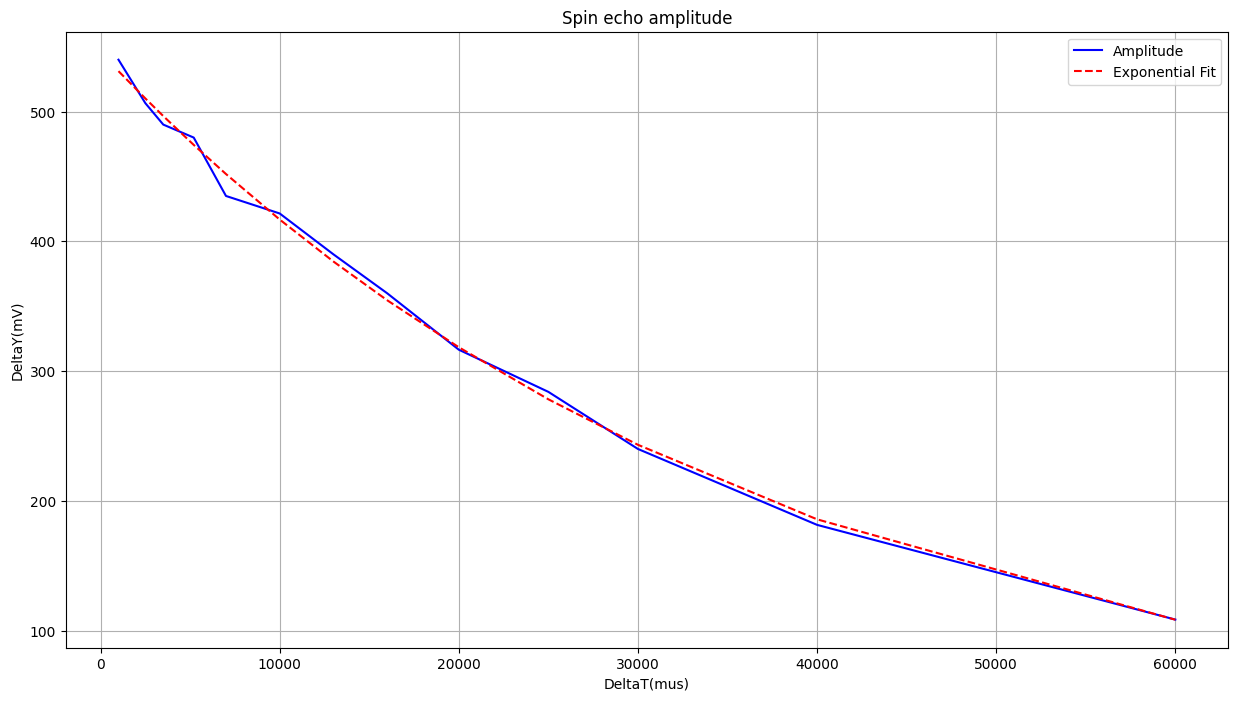

Optimized Parameters (M0, T2*): [  545.68531897 37122.75148985]
T2* = 37122.75148984714 +/- 777.1252310219724


In [ ]:
peak_ampl = pd.read_excel("Amplitude_Data/Amplitude.xlsx", usecols = [5, 6], header = 1)
peak_ampl.iloc[:, 1] = peak_ampl.iloc[:, 1] / 2

def exponential_func(x, a, tau):
    return a * np.exp(-x / tau)
  
popt, pcov = curve_fit(exponential_func, peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], p0 = [1000, 20000])
std_dev_T2 = np.sqrt(pcov[1, 1])

plt.figure(figsize=(15, 8))
plt.plot(peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], 'b-', label='Amplitude')
plt.plot(peak_ampl.iloc[:, 0], exponential_func(peak_ampl.iloc[:, 0], *popt), 'r--', label='Exponential Fit')
plt.xlabel(peak_ampl.columns[0])
plt.ylabel(peak_ampl.columns[1])
plt.title('Spin echo amplitude')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimized Parameters (M0, T2*): {popt}")
print(f"T2* = {popt[1]} +/- {std_dev_T2}")

################################################

# NB: TIME DATA HERE ARE IN MICROSECONDS!!! 37000 ms -> 0.37 seconds 

### 6\.

In general the decay constant $T^⋆_2$ in the free induction decay contains the effects of the spin-spin interaction, spin-lattice relaxation, and the magnetic field inhomogeneity:
$$
\frac{1}{T^⋆_2} = \frac{1}{T_2} + \frac{1}{T_1} + \gamma _p \Delta B_0 
$$
Can you give an estimate of the field inhomogeneity across the sample?

In [ ]:
x = (0.5 * 10 **-4) * (gyromag_ratio * 10 **-6)
print(x)
print((x - 1/37000))
print(1/(x - 1/37000)) 
print((1/262 - 1/37100) / (gyromag_ratio * 10 **-6)/0.571/10**-4)

0.0021287800000000003
0.002101752972972973
475.79330818572805
1.5589204614159573


### 7\.

More studies on best T1

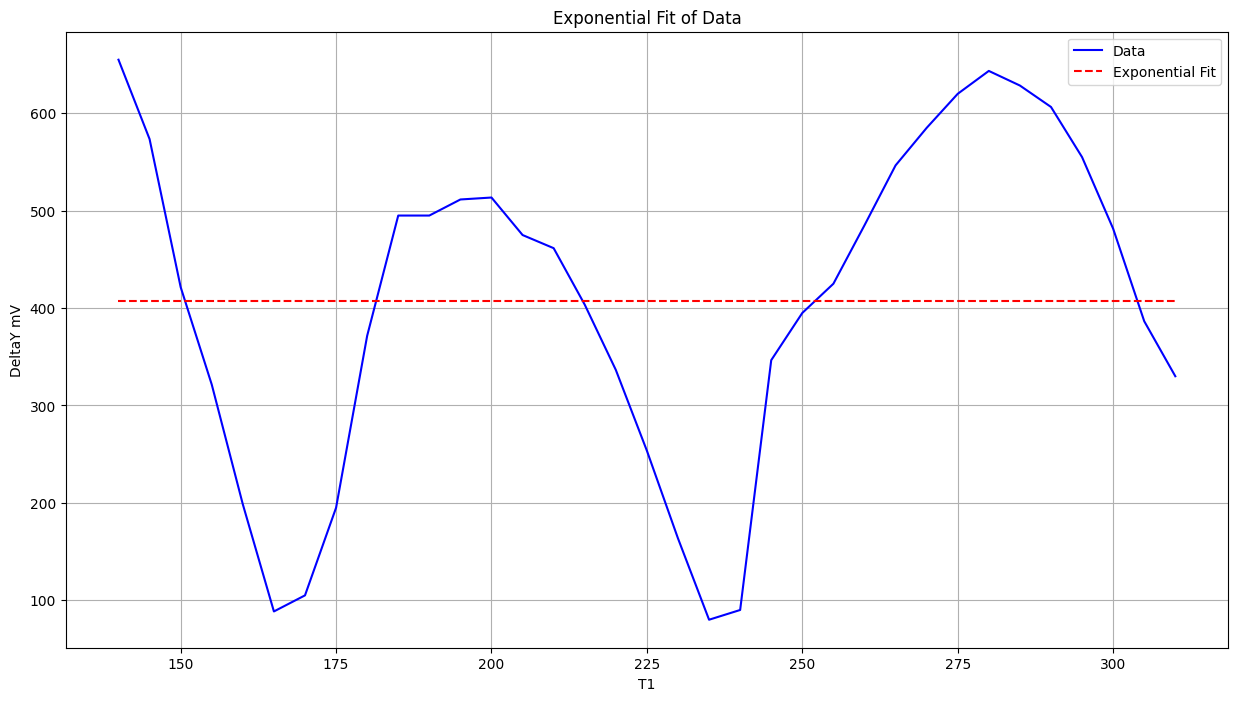

Optimized Parameters (M0, T2*): [4.06942883e+02 2.97655753e+09]
T2* = 2976557533.2814407 +/- 6940395323460805.0


In [ ]:
peak_ampl = pd.read_excel("Amplitude_Data/Amplitude.xlsx", sheet_name="Foglio2", usecols = [1, 2], header = 3)
peak_ampl.iloc[:, 1] = peak_ampl.iloc[:, 1] / 2

def exponential_func(x, a, tau):
    return a * np.exp(-x / tau)
  
popt, pcov = curve_fit(exponential_func, peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], p0 = [1000, 20000])
std_dev_T2 = np.sqrt(pcov[1, 1])

plt.figure(figsize=(15, 8))
plt.plot(peak_ampl.iloc[:, 0], peak_ampl.iloc[:, 1], 'b-', label='Data')
plt.plot(peak_ampl.iloc[:, 0], exponential_func(peak_ampl.iloc[:, 0], *popt), 'r--', label='Exponential Fit')
plt.xlabel(peak_ampl.columns[0])
plt.ylabel(peak_ampl.columns[1])
plt.title('Exponential Fit of Data')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimized Parameters (M0, T2*): {popt}")
print(f"T2* = {popt[1]} +/- {std_dev_T2}")

################################################

# NB: TIME DATA HERE ARE IN MICROSECONDS!!! 37000 ms -> 0.37 seconds 